In [6]:
import numpy as np
import matplotlib.pyplot as plt

# A Decision Tree for Regression

In [7]:
'main function'
def decision_tree_regression(X,y,max_level,level=0):
    
    size = X.shape
    try:
        n_features = size[1]
    except IndexError:
        n_features = 1
        X = X[:,None]
        
    'let the algorithm choose the feature'
    p_list = np.zeros(n_features) 
    MSE_list = np.zeros(n_features)
    for feature in range(n_features): #for each feature, find the best partition
        feature_grid = np.linspace(np.max(X[:,feature]),np.min(X[:,feature]),1000)
        MSE_grid = []
        for p in feature_grid: #for each partition, find the MSE
            'subset 1'
            X1 = X[X[:,feature]>=p]
            y1 = y[X[:,feature]>=p]
            if len(y1)>0:
                MSE1 = np.linalg.norm(y1-np.mean(y1))
            else:
                MSE1 = 0
            'subset 2'
            X2 = X[X[:,feature]<p]
            y2 = y[X[:,feature]<p]
            if len(y2)>0:
                MSE2 = np.linalg.norm(y2-np.mean(y2))
            else:
                MSE2 = 0
            'MSE of the partition'
            MSE_grid.append(MSE1+MSE2)
            
        idx = np.argmin(MSE_grid) 
        p_list[feature] = feature_grid[idx]
        MSE_list[feature] = MSE_grid[idx]
    
    feature = np.argmin(MSE_list)
    optimal_p = p_list[feature]
    
    Tree = [optimal_p]    
    feature_Tree = [feature]
    
    'two subsets'
    X1,y1 = X[X[:,feature]>=optimal_p], y[X[:,feature]>=optimal_p] # subset 1
    X2,y2 = X[X[:,feature]<optimal_p], y[X[:,feature]<optimal_p] # subset 2
    
    values_Tree = []
    if len(y1)>0: #if y1 is not empty
        values_Tree.append(np.mean(y1))
    else:
        values_Tree.append(0)
    if len(y2)>0:
        values_Tree.append(np.mean(y2))
    else:
        values_Tree.append(0)

    
    X_subsets = [X1,X2]
    y_subsets = [y1,y2]
    
    if level<max_level:
        level = level+1
        
        Tree_next_level = []
        values_Tree_next_level = []
        feature_Tree_next_level = []
        for i in range(2):
            if len(y_subsets[i])>0: #if the set is not empty
                new_tree_list,new_values_tree,new_feature_list = decision_tree_regression(X_subsets[i],
                                                                               y_subsets[i],
                                                                               max_level=max_level,
                                                                               level=level)
                Tree_next_level.append(new_tree_list)
                values_Tree_next_level.append(new_values_tree)
                feature_Tree_next_level.append(new_feature_list)
            else:
                Tree_next_level.append('stop')
                values_Tree_next_level.append('stop')
                feature_Tree_next_level.append('stop')
        
        Tree.append(Tree_next_level)
        values_Tree.append(values_Tree_next_level)
        feature_Tree.append(feature_Tree_next_level)
    return Tree,values_Tree,feature_Tree

In [8]:
'predictor function'
def tree_predictor(Tree,values_Tree,feature_Tree,new_point,max_level):
    next_level = True
    level = 0
    try: #check whether new_point is a scalar or a vector
        new_point[0]
    except IndexError: #new_point is a scalar
        new_point = new_point[None] #new_point is a 1-component vector
    while level<max_level:
        feature = feature_Tree[0]
        p = Tree[0]
        if new_point[feature]>=p:
            y_predicted = values_Tree[0]
            Tree = Tree[1][0]
            values_Tree = values_Tree[2][0]
            feature_Tree = feature_Tree[1][0]
            if values_Tree == 'stop':
                return y_predicted
        else:
            y_predicted = values_Tree[1]
            Tree = Tree[1][1]
            values_Tree = values_Tree[2][1]
            feature_Tree = feature_Tree[1][1]
            if values_Tree == 'stop':
                return y_predicted
        level = level + 1
        
    'deepest level'
    p = Tree[0]
    feature = feature_Tree[0]
    if new_point[feature]>=p:
        y_predicted = values_Tree[0]
    else:
        y_predicted = values_Tree[1]
    return y_predicted

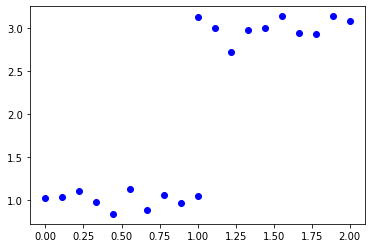

In [9]:
'example 1'
x = np.zeros(20)
y = np.zeros(20)

x[:10] = np.linspace(0,1,10)
y[:10] = 1 + 0.1*np.random.randn(10)

x[10:] = np.linspace(1,2,10)
y[10:] = 3 + 0.1*np.random.randn(10)
plt.plot(x,y,'ob')

In [10]:
max_level = 5
Tree,values_Tree,feature_Tree = decision_tree_regression(x,y,max_level)

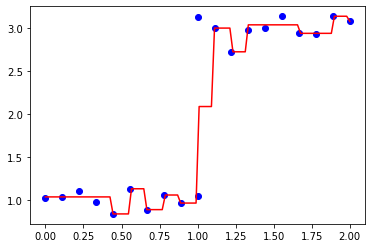

In [11]:
x_plot = np.linspace(0,2,100)
y_plot = np.array([tree_predictor(Tree,values_Tree,feature_Tree,x,max_level) for x in x_plot])

plt.plot(x,y,'ob')
plt.plot(x_plot,y_plot,'r-')

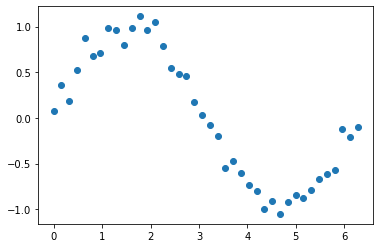

In [12]:
'example 2'
x = np.linspace(0,2*np.pi,40)
y = np.sin(x) + 0.1*np.random.randn(40)
plt.plot(x,y,'o')

In [13]:
max_level = 5
Tree,values_Tree,feature_Tree = decision_tree_regression(x,y,max_level)

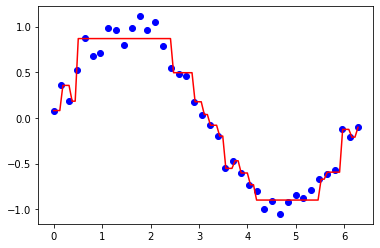

In [14]:
x_plot = np.linspace(0,2*np.pi,100)
y_plot = np.array([tree_predictor(Tree,values_Tree,feature_Tree,x,max_level) for x in x_plot])

plt.plot(x,y,'ob')
plt.plot(x_plot,y_plot,'r-')

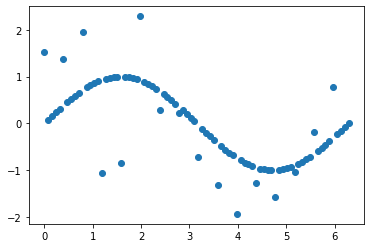

In [15]:
'example 3: Trees are sensitive to noise and outliers, and are prone to overfitting'
x = np.linspace(0,2*np.pi,80)
y = np.sin(x)
y[::5] += 4* (0.5 - np.random.rand(16)) #add noise to y[0], y[5], y[10],...,y[80]
plt.plot(x,y,'o')

Text(0.5, 1.0, 'overfitted model')

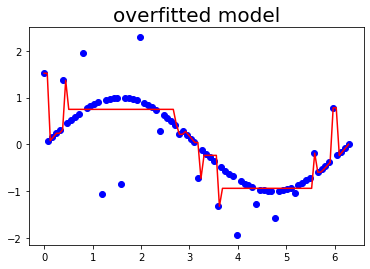

In [16]:
max_level = 10
Tree,values_Tree,feature_Tree = decision_tree_regression(x,y,max_level)
x_plot = np.linspace(0,2*np.pi,100)
y_plot = np.array([tree_predictor(Tree,values_Tree,feature_Tree,x,max_level) for x in x_plot])
plt.plot(x,y,'ob')
plt.plot(x_plot,y_plot,'r-')
plt.title('overfitted model',fontsize=20)

## Random Forest

Decision Trees are prone to overfitting

In [17]:
'Generate 10 subsets each containing 20 data points selected randomly'
n_subsets = 10 
subset_size = 20

x_subsets = []
y_subsets = []
for i in range(n_subsets):
    idx = np.random.permutation(len(x)) #random permutation
    x_subsets.append(x[idx[:subset_size]])
    y_subsets.append(y[idx[:subset_size]])

In [18]:
'Train 10 Decision Trees'
Forest = [decision_tree_regression(x_subsets[i],y_subsets[i],max_level=10) for i in range(n_subsets)]

In [19]:
def Forest_predictor(Forest, new_point,max_level):
    predictions = [tree_predictor(Tree[0],Tree[1],Tree[2],new_point,max_level) for Tree in Forest] 
    return np.mean(predictions)

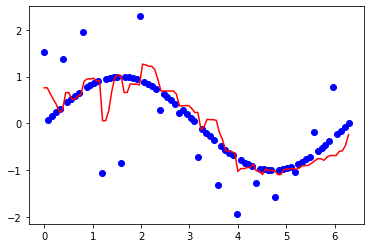

In [20]:
x_plot = np.linspace(0,2*np.pi,100)
y_plot = np.array([Forest_predictor(Forest,x,max_level=10) for x in x_plot])
plt.plot(x,y,'ob')
plt.plot(x_plot,y_plot,'r-')